# PyBer

## Import Data and Dependencies

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Import all necessary dependencies
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os

In [4]:
# Import .csvs into DataFrames

city_data_df = pd.read_csv("Resources/city_data.csv")

ride_data_df = pd.read_csv("Resources/ride_data.csv")

print(city_data_df.head(10))
print(ride_data_df.head(10))

            city  driver_count   type
0    Richardfort            38  Urban
1   Williamsstad            59  Urban
2    Port Angela            67  Urban
3     Rodneyfort            34  Urban
4    West Robert            39  Urban
5   West Anthony            70  Urban
6    West Angela            48  Urban
7  Martinezhaven            25  Urban
8      Karenberg            22  Urban
9    Barajasview            26  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
5        South Latoya  2019-03-11 12:26:48   9.52  1994999424437
6       New Paulville  2019-02-27 11:17:56  43.25   793208410091
7        Simpsonburgh  2019-04-26 00:43:24  35.98   1119539277

## Explore the Data

In [21]:
# Determine what kind of data types are in city_data
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [22]:
# Determine what kind of data types are in ride_data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [30]:
# Count the number of data entries and determine if there are any null values for city_data
print(city_data_df.count())
print(city_data_df.isnull().sum())

city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64


In [32]:
# Count the number of data entries and determine if there are any null values for ride_data
print(ride_data_df.count())
print(ride_data_df.isnull().sum())

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64


In [33]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [44]:
# Get unique values for ride_data and city_data "city" Series to see if they are appropriate for a merge
print(len(ride_data_df['city'].unique()))
print(len(city_data_df['city'].unique()))

120
120


In [35]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [36]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [37]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

## Merge the DataFrames

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Merged DataFrame

In [15]:
# Create different DataFrames for each 'city type' (urban, suburban, rural) to be reference in later calculations
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [12]:
# Average fare for each 'city type'
urban_avg_fare = urban_cities_df["fare"].mean()
rural_avg_fare = rural_cities_df["fare"].mean()
suburban_avg_fare = suburban_cities_df["fare"].mean()


30.97012800000002

In [16]:
# Total number of rides for each 'city type', to be plotted on x-axis
urban_total_rides = urban_cities_df["type"].count()
suburban_total_rides = suburban_cities_df["type"].count()
rural_total_rides = rural_cities_df["type"].count()

In [19]:
# Get the number of rides for urban, rural, and suburban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [21]:
# Get the average fare for each urban, rural, and suburban city
urban_avg_fare_by_city = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare_by_city = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare_by_city = rural_cities_df.groupby(["city"]).mean()["fare"]

In [23]:
# Make size of bubbles relative to average number of drivers for each 'city type'
urban_driver_count_by_city = urban_cities_df.groupby(["city"]).mean()['driver_count']
suburban_driver_count_by_city = suburban_cities_df.groupby(["city"]).mean()['driver_count']
rural_driver_count_by_city = rural_cities_df.groupby(["city"]).mean()['driver_count']

## Bubble Plots by City Type

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

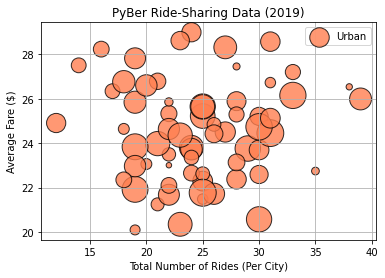

In [35]:
# Create scatter plots for Urban 'city type' using MATLAB method
plt.scatter(urban_ride_count, urban_avg_fare_by_city, 
            s=10*urban_driver_count_by_city, 
            color='coral', edgecolor='black', linewidth=1,
            alpha=.8, label="Urban")
plt.legend()
plt.grid('True')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title("PyBer Ride-Sharing Data (2019)")

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

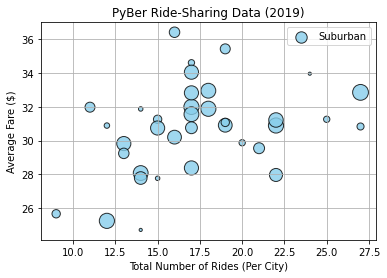

In [34]:
# Create scatter plots for Suburban 'city type' using MATLAB method
plt.scatter(suburban_ride_count, suburban_avg_fare_by_city, 
            s=10*suburban_driver_count_by_city, 
            color='skyblue', edgecolor='black', linewidth=1,
            alpha=.8, label="Suburban")
plt.legend()
plt.grid('True')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title("PyBer Ride-Sharing Data (2019)")

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

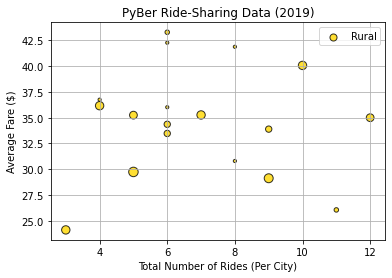

In [36]:
# Create scatter plots for Rural 'city type' using MATLAB method
plt.scatter(rural_ride_count, rural_avg_fare_by_city, 
            s=10*rural_driver_count_by_city, 
            color='gold', edgecolor='black', linewidth=1,
            alpha=.8, label="Rural")
plt.legend()
plt.grid('True')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title("PyBer Ride-Sharing Data (2019)")

## Merged Bubble Plot for All City Types

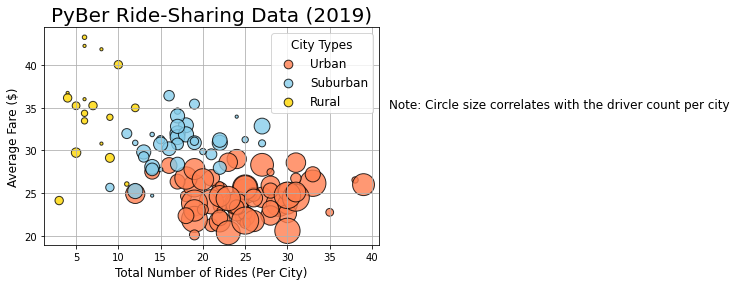

In [59]:
# Create a single scatter plot with all three of the different 'city type' data displayed
plt.scatter(urban_ride_count, urban_avg_fare_by_city, 
            s=10*urban_driver_count_by_city, 
            color='coral', edgecolor='black', linewidth=1,
            alpha=.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare_by_city, 
            s=10*suburban_driver_count_by_city, 
            color='skyblue', edgecolor='black', linewidth=1,
            alpha=.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare_by_city, 
            s=10*rural_driver_count_by_city, 
            color='gold', edgecolor='black', linewidth=1,
            alpha=.8, label="Rural")

# Add a grid
plt.grid('True')

# Label axes
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)

# Add a title
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add text to explain the size of each bubble
plt.text(42, 35, "Note: Circle size correlates with the driver count per city", fontsize=12)

# Save the figure
plt.savefig("analysis/Fig1.png")

plt.show()

## Summary Statistics

In [73]:
# Get summary statistics on each 'city_type' DataFrame
print("Urban\n",
      urban_cities_df.describe(), "\n")
print("Suburban\n",
      suburban_cities_df.describe(), "\n")
print("Rural\n",
      rural_cities_df.describe(), "\n")

Urban
               fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000 

Suburban
              fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712000
std     10.677508  2.912410e+12      8.042372
min     12.050000  3.218337e+08      1.000000
25%     21.970000  2.364253e+12      5.000000
50%     30.750000  5.053221e+12     16.000000
75%     39.830000  7.551674e+12     21.000000
max     49.960000  9.917744e+12     25.000000 

Rural
              fare       ride_id  driver_count
count  125.000000  1.250000e+02    125.000000
mean    34.623440  4.647746e+12      4.2960

In [75]:
# Calculate summary statistics of ride count for each 'city_type'
print("Urban\n",
      urban_ride_count.describe(), "\n")
print("Suburban\n",
      suburban_ride_count.describe(), "\n")
print("Rural\n",
      rural_ride_count.describe(), "\n")

Urban
 count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64 

Suburban
 count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64 

Rural
 count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64 



In [76]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [79]:
# Calculate the mode of the ride count for the urban cities.
print("Urban", urban_ride_count.mode(), "\n") 
print("Suburban", suburban_ride_count.mode(), "\n")
print("Rural",rural_ride_count.mode())

Urban 0    22
1    25
dtype: int64 

Suburban 0    17
dtype: int64 

Rural 0    6
dtype: int64


In [81]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

### Measures of Central Tendency for Ride Counts

In [ ]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

In [83]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [84]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


### Measures of Central Tendency for Fare Price

#### Create Series for fares of each 'city type' 

In [88]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [89]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [90]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [91]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [92]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [93]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


### Measures of Central Tendency for Number of Drivers

In [95]:
# Create series for number of drivers from each city in each 'city type'
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [102]:
# Skill Drill 5.4.3 
# Calculate the mean, median, and mode for the 
# urban, suburban, and rural driver count Series using NumPy and SciPy statistics modules

# Urban
mean_urban_drivers = urban_drivers.mean()
print(f"The mean urban drivers count is {mean_urban_drivers:.2f}.")

median_urban_drivers = urban_drivers.median()
print(f"The median urban drivers count is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode of urban drivers count is {mode_urban_drivers}.")

The mean urban drivers count is 36.68.
The median urban drivers count is 37.00.
The mode of urban drivers count is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [104]:
# Skill Drill 5.4.3 
# Calculate the mean, median, and mode for the 
# urban, suburban, and rural driver count Series using NumPy and SciPy statistics modules

# Suburban
mean_suburban_drivers = suburban_drivers.mean()
print(f"The mean suburban drivers count is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = suburban_drivers.median()
print(f"The median suburban drivers count is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode of suburban drivers count is {mode_suburban_drivers}.")

The mean suburban drivers count is 13.71.
The median suburban drivers count is 16.00.
The mode of suburban drivers count is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [105]:
# Skill Drill 5.4.3 
# Calculate the mean, median, and mode for the 
# urban, suburban, and rural driver count Series using NumPy and SciPy statistics modules

# Rural
mean_rural_drivers = rural_drivers.mean()
print(f"The mean rural drivers count is {mean_rural_drivers:.2f}.")

median_rural_drivers = rural_drivers.median()
print(f"The median rural drivers count is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode of rural drivers count is {mode_rural_drivers}.")

The mean rural drivers count is 4.30.
The median rural drivers count is 4.00.
The mode of rural drivers count is ModeResult(mode=array([1], dtype=int64), count=array([32])).


## Box-and-Whisker Plots

### Box-and-Whisker Plots for Ride Count Data

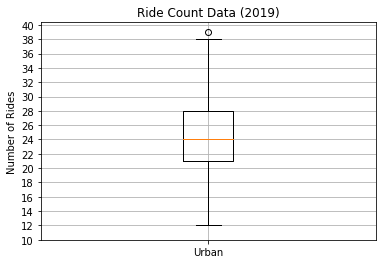

In [106]:
# Create a box-and-whisker plot for the urban cities' ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

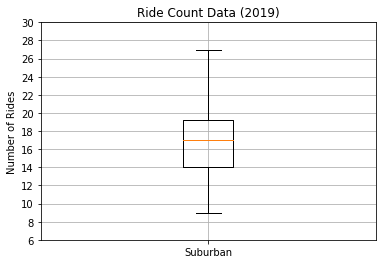

In [115]:
# Create box-and-whisker plot for the suburban cities' ride count
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(6, 31, step=2.0))
ax.grid()
plt.show()

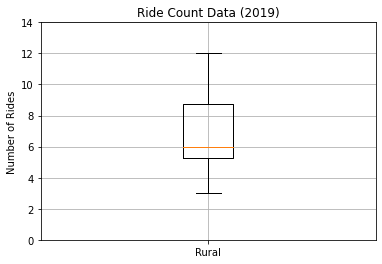

In [116]:
# Create box-and-whisker plot for the rural cities' ride count
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0, 15, step=2.0))
ax.grid()
plt.show()

#### Combined Box-and-Whisker Plot for Number of Riders from Each City Type

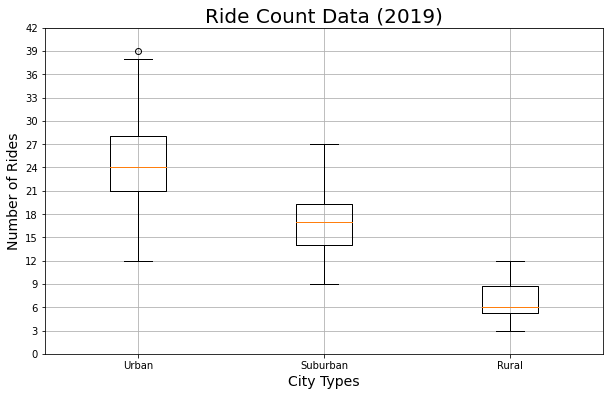

In [117]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

#### Find the Outlier City

In [118]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


### Box-and-Whisker Plots for Ride Fare Data

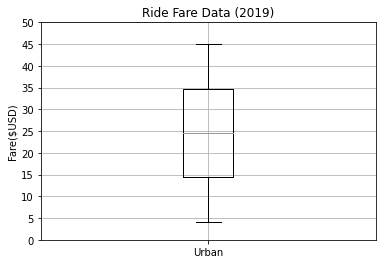

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [119]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

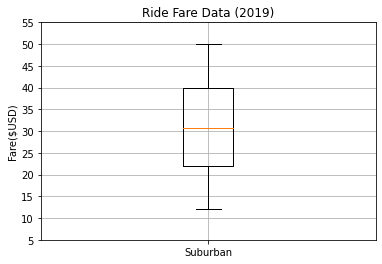

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [121]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 56, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

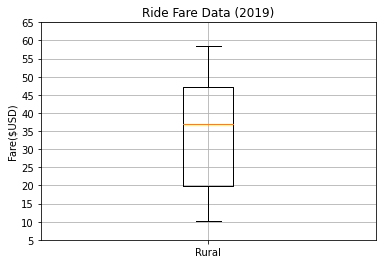

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [124]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 66, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

#### Create a Box-and-Whisker Plot with All City Type Data Combined

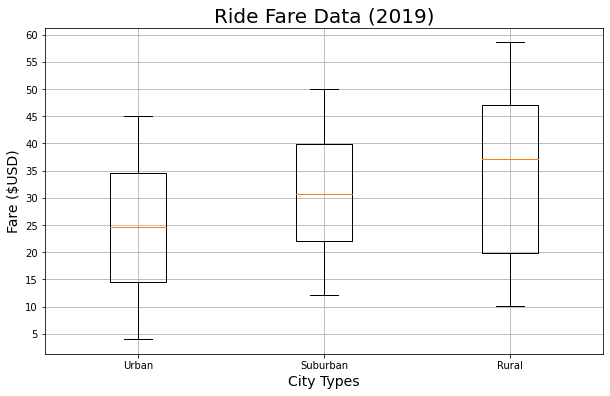

In [153]:
# Create a box-and-whiskers variable for different 'city type' data Series
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))

# Format labels, axis, and title
ax.set_title("Ride Fare Data (2019)", size=20)
ax.set_ylabel("Fare ($USD)", size=14)
ax.set_xlabel("City Types", size=14)

# Plot data and format chart
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(5, 65, step=5.0))
ax.grid()

# Save figure
plt.savefig("analysis/Fig3.png")
plt.show()

### Box-and-Whisker Plots for Driver Count Data

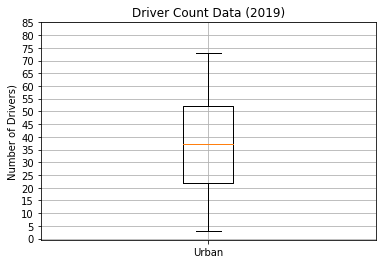

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [146]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

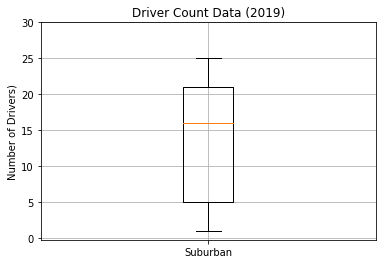

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [148]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 31, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

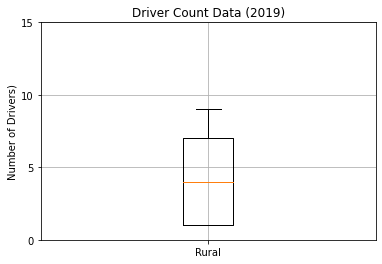

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [150]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 16, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

#### Combined Box-and-Whisker Plot for Driver Counts by City Type

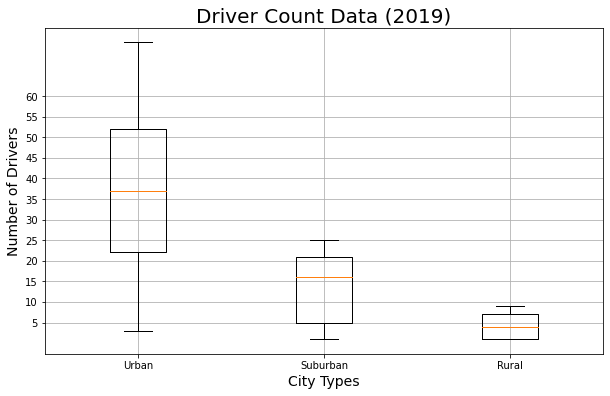

In [154]:
# Create a box-and-whiskers variable for different 'city type' data Series
x_labels = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))

# Format labels, axis, and title
ax.set_title("Driver Count Data (2019)", size=20)
ax.set_ylabel("Number of Drivers", size=14)
ax.set_xlabel("City Types", size=14)

# Plot data and format chart
ax.boxplot(driver_data, labels=x_labels)
ax.set_yticks(np.arange(5, 65, step=5.0))
ax.grid()

# Save figure
plt.savefig("analysis/Fig4.png")
plt.show()

## Get the Percentages of Fares for Each City Type

In [155]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [156]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [157]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

### Create a Pie Chart Showing Revenue by City Type

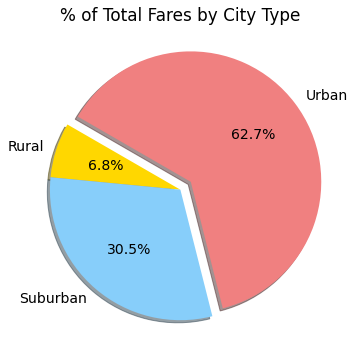

In [164]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

## Calculate Ride Percentages by City Type

In [161]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

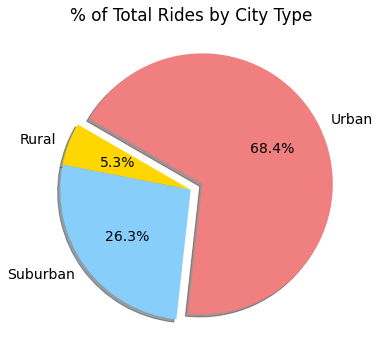

In [166]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

## Calculate Driver Percentages by City Type

In [175]:
# Calculate the percentage of rides for each city type.
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["ride_id"].count()
driver_percents

type
Rural         22.610526
Suburban     360.842105
Urban       2509.557895
Name: driver_count, dtype: float64

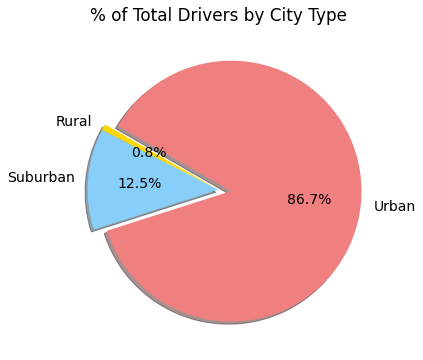

In [176]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()